<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E1/blob/main/RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading and viewing data**

In [ ]:
#Importa libreria pandas para leer los datos

import pandas as pd
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Visualization of relationships between variables**

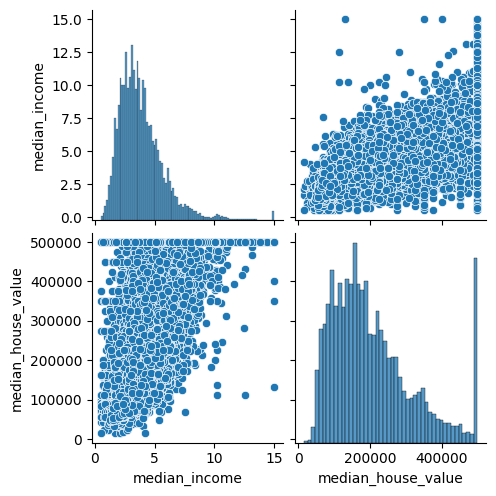

In [ ]:
# Visualizamos las relaciones generando gráficos

import seaborn as sns
import matplotlib.pyplot as plt
cols = ['median_income', 'median_house_value']
sns.pairplot(df[cols])
plt.show()

# **Heat map**

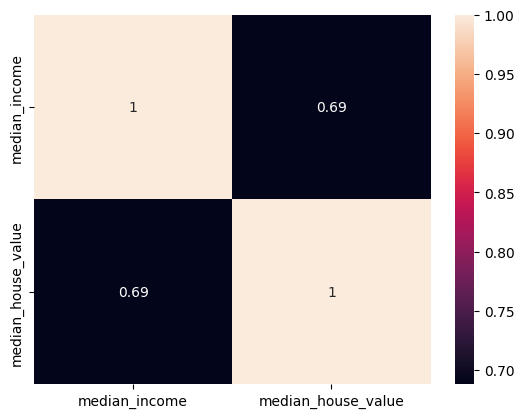

In [ ]:
#Para una mejor comprension se realiza un mapa de calor

numeric_cols = ['median_income', 'median_house_value']
sns.heatmap(df[numeric_cols].corr(), annot = True)
plt.show()

# **Regression model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variable independiente y dependiente
X = df[['median_income']].values    # nota: doble corchete para mantener 2D
Y = df[['median_house_value']].values

# Crear scalers
ss_x = StandardScaler()
ss_y = StandardScaler()

# Ajustar scalers y transformar datos
X_scaled = ss_x.fit_transform(X)
Y_scaled = ss_y.fit_transform(Y)

# Creación y entrenamiento del modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_scaled, Y_scaled)
print("Modelo entrenado correctamente")

Modelo entrenado correctamente


# **Interactive Menu**

In [ ]:
# Entrada del usuario
number_income = float(input("Ingresá un valor de median_income: "))

# Escalar, predecir y des-escalar
number_income_std = ss_x.transform([[number_income]])
pred_std = lr.predict(number_income_std)
pred = ss_y.inverse_transform(pred_std)

# Mostrar predicción
print("Para median_income = ", number_income,
      "la predicción de median_house_value es US$", round(pred[0][0], 2))

Ingresá un valor de median_income: 50
Para median_income =  50.0 la predicción de median_house_value es US$ 2134778.04
